In [196]:
import pymoo
import string
from pymoo.core.problem import ElementwiseProblem
import numpy as np

In [197]:
phrase = "To be, or not to be, that is the question"


In [198]:
phrase_list = [i for i in phrase]

In [199]:
global phrase_list

In [200]:
class ShakespeareProblem(ElementwiseProblem):
    def __init__(self, phrase_list):
        xl = np.zeros(len(phrase_list))

        xu = np.ones(len(phrase_list)) * 99

        super().__init__(n_var=len(phrase_list), n_obj=1, n_ieq_constr=2, xl=xl, xu=xu, type_var=np.int32)

    def _evaluate(self, x, out, *args, **kwargs):

        score = 0
        for i in range(len(phrase_list)):
            if phrase_list[i] == string.printable[int(x[i])]:
                score += 1

        out["F"] = -1 * score
        #out["G"] = -1 * score

In [201]:
ITERATIONS = 200
POPULATION = 1000

In [202]:
problem = ShakespeareProblem(phrase_list=phrase_list)

In [203]:
def decode_String(pop_individual):
    final_str = ""
    for i in pop_individual:
        final_str += (string.printable[int(i)])
    return final_str

In [204]:
from pymoo.util.display.column import Column
from pymoo.util.display.output import Output


class MyOutput(Output):

    def __init__(self):
        super().__init__()
        self.score = Column("score", width=13)
        self.Phrase = Column("Phrase", width=45)
        self.columns += [self.score, self.Phrase]

    def update(self, algorithm):
        super().update(algorithm)
        self.score.set(-np.min(algorithm.pop.get("F")))
        self.Phrase.set(decode_String(algorithm.pop.get("X")[0]))

In [205]:
# Define your custom callback to store the best solutions
best_solutions = []

def store_best_solution(algorithm):
    best_solutions.append(algorithm.pop.get("X")[0])

In [206]:
from pymoo.optimize import minimize
from pymoo.termination import get_termination
from pymoo.algorithms.soo.nonconvex.ga import GA

algorithm = GA(pop_size=POPULATION)

term = get_termination("n_gen", ITERATIONS)

res = minimize(problem,
               algorithm,
               #seed=SEED,
               save_history=True,
               output=MyOutput(),
               verbose=True,
               termination = term,
               callback=store_best_solution)

n_gen  |  n_eval  |     score     |                     Phrase                   
     1 |     1000 |  4.0000000000 |     .l,}?2I`)F \GFf)vWCd`K@R[7fi=qyL#??$!EFQT
     2 |     2000 |  4.0000000000 |     ccb22R&o3Rwo+g4QhgAg0e R7T?soT=#AsIn,tX-J
     3 |     3000 |  4.0000000000 |     ccb22R&o3Rwo+g4QhgAg0e R7T?soT=#AsIn,tX-J
     4 |     4000 |  4.0000000000 |     ccb22R&o3Rwo+g4QhgAg0e R7T?soT=#AsIn,tX-J
a|!@|=>KM    5000 |  5.0000000000 |     Tj*	e(k"r H|j \{	8j
a|!@|=>KM    6000 |  5.0000000000 |     Tj*	e(k"r H|j \{	8j
     7 |     7000 |  6.0000000000 |     Tc=k=J ,r{zuq\/_.AFA dhtEBXW
t;8'V\MjaSLV
     8 |     8000 |  6.0000000000 |     Tc=k=J ,r{zuq\/_.AFA dhtEBXW
t;8'V\MjaSLV
     9 |     9000 |  7.0000000000 |     v68bTf@ooik=sB&p4N>85tSD0 is
4[eIO#~uxtK0
    10 |    10000 |  7.0000000000 |     v68bTf@ooik=sB&p4N>85tSD0 is
4[eIO#~uxtK0
    11 |    11000 |  8.0000000000 |     te92O,"o,c2oabcThcT48*Sy7*o3 t*+qqcd2te*n
    12 |    12000 |  8.0000000000 |     te92O,"o,c2oabcThcT4

In [207]:
decode_String(res.pop.get("X")[0])

'To be, or not to be, that is the question'

In [208]:
99 ** len(phrase)

6622820409839837087989552128156750893507779541456909263939129526255095863651804099

In [209]:
np.float_power(99, len(phrase))

6.622820409839837e+81

In [210]:
text_list = [decode_String(array) for array in best_solutions]

In [211]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [212]:
import imageio
from IPython.display import display, Image

def generate_GIF(text_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, text in enumerate(text_list):
        image = string_to_image(text)
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=2)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output.gif"

    # Display the GIF
    display(Image(filename=gif_path))

C:\Users\Felps\AppData\Local\Temp\ipykernel_18344\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18344\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18344\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users\Felps\AppData\Local\Temp\ipykernel_18344\1004735124.py:14: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(text, font)
C:\Users

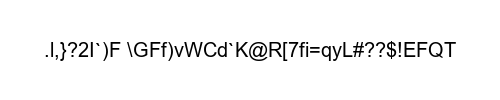

In [213]:
generate_GIF(text_list);

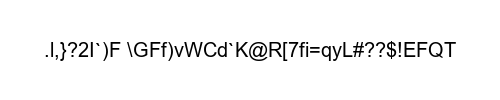

In [215]:
# Path to your GIF file
gif_path = "output.gif"

# Display the GIF
display(Image(filename=gif_path))